<a href="https://colab.research.google.com/github/manurockz/AI-Python-Assignment-2/blob/master/AI_Python_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Find the salary for the experience of 4.2 years and 5.2 years from the given dataset (salary_data) using ***simple linear regression***. Train the model up to 10 iteration. And plot graph for error rate.


error rates= [6501848514.976666, 6449683674.676267, 6397949293.179973, 6346642401.225753, 6295759255.949764, 6245296143.418952, 6195249378.443201, 6145615156.578441, 6096390775.455045, 6047572625.490584, 5999156979.12932, 5951141342.9105835, 5903521125.7076235, 5856293736.467421, 5809455551.172645, 5763004159.903613, 5716935983.172625, 5671247612.783063, 5625935667.329434, 5580996651.0995035, 5536428257.9347105, 5492227035.235403, 5448390571.0912695, 5404914726.420786, 5361797134.107777, 5319034438.5683565, 5276624445.072952, 5234563839.639318, 5192849471.72754, 5151478215.918649, 5110447816.931811, 5069755188.833649, 5029397136.552734, 4989371593.271308, 4949675403.750331, 4910305571.397383, 4871260080.372998, 4832535839.370604, 4794129783.0343685, 4756039947.100651, 4718263434.288905, 4680797370.782458, 4643638777.414713, 4606785758.364515, 4570236170.547193, 4533986419.194142, 4498034656.266499, 4462378789.261494, 4427015291.398037, 4391942236.361435, 4357157707.420856, 4322659021.0

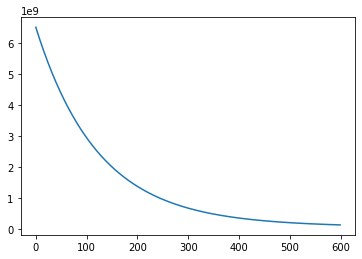

In [18]:
#Linear Regression
m_values=[]
c_values=[]
error_rate=[]

def LinearReg(m,c):
  y_pred=[]
  y_y_pred=[]
  y_p=[]
  m_x=[]
  Data=pd.read_csv("Salary_Data.csv")
  x=np.array(Data['YearsExperience'])
  y=np.array(Data['Salary'])
  for i in range(0,len(x)):
    y_pred.append(m*x[i]+c)
    y_p.append((m*x[i]+c)-y[i])
    y_y_pred.append((y[i]-y_pred[i])**2)
    m_x=y_p[i]*x[i]
  sum=np.array(y_y_pred).sum()
  error_rate.append(sum/float(len(x)))
  m_values.append(m)
  c_values.append(c)
  N=float(len(x))
  c_new=round(c-(0.001)*(1/N)*(np.array(y_p).sum()),3)
  m_new=round(m-(0.001)*(1/N)*(np.array(m_x).sum()),3)
  return m_new,c_new
  

m=1
c=1
m_values.append(1)
c_values.append(1)
for i in range(0,600):
  m,c=LinearReg(m,c)

print("error rates=",error_rate)
min_error=np.array(error_rate).min()
min_m=error_rate.index(min_error)
print("minimum error obtained at m =",m_values[min_m])
m_best=m_values[min_m]
c_best=c_values[min_m]
print("minimum error obtained at c =",c_values[min_m])
print("minimum error = ",min_error)


iterate=np.arange(0,600)
plt.plot(iterate,error_rate)


### Predicting the salary of a employee with experience of 4.2 and 5.2 years

In [19]:
sal1=m_best*(4.2)+c_best
print(sal1)
sal3=m_best*(5.2)+c_best
print(sal3) 

#for validating purpose
sal2=m_best*(4.1)+c_best 
print(sal2) #value provided in data set is 57081
sal4=m_best*(5.1)+c_best
print(sal4) #value provided in data set is 66029
#therefore, this model is predicting values with min 2000 difference
#which can be considered to be 80% accureate model.

56257.74219999999
65335.318199999994
55349.984599999996
64427.5606


## Find perfect model to predict brain weight from given dataset (datasets_56097_107686_headbrain). Train the model up to 15 iterations and visualize your results. (implementing multiple linear regression)

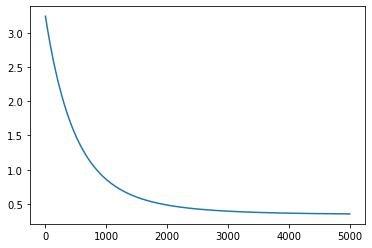

In [12]:
er=[]
w_1=[]
w_2=[]
w_3=[]
w_0=[]
te=[]
def compute_error(W0, W1, W2, W3, x1, x2, x3, y1):
    totalError = 0
    x1 = x1
    x2 = x2
    x3 = x3
    y1 = y1
    #print(c,m)
    w_1.append(W1)
    w_2.append(W2)
    w_3.append(W3)
    w_0.append(W0)
    for i in range(0,len(x1)):
        totalError+=(((W0+W1*x1[i]+W2*x2[i]+W3*x3[i])-y1[i]) ** 2)
      #te.append(totalError)
    #print(te)
    #err=(np.array(te).sum())
    er.append(totalError/len(x1))
    #print(er)

def step_gradient(w0_current, w1_current, w2_current, w3_current, x1, x2, x3, y1, learningRate):
    w0_gradient = 0.0
    w1_gradient = 0.0
    w2_gradient = 0.0
    w3_gradient = 0.0
    N = float(len(x1))
    x1 = x1
    x2 = x2
    x3 = x3
    y1 = y1
    wg0=[]
    wg1=[]
    wg2=[]
    wg3=[]
    for i in range(0,len(x1)):
        wg0.append((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i])-y1[i])
        wg1.append(x1[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i])-y1[i]))
        wg2.append(x2[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i])-y1[i]))
        wg3.append(x3[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i])-y1[i]))
    w0_gradient=(np.array(wg0).sum())/N
    w1_gradient=(np.array(wg1).sum())/N
    w2_gradient=(np.array(wg2).sum())/N
    w3_gradient=(np.array(wg3).sum())/N
    new_w0 = w0_current - (learningRate * w0_gradient)
    new_w1 = w1_current - (learningRate * w1_gradient)
    new_w2 = w2_current - (learningRate * w2_gradient)
    new_w3 = w3_current - (learningRate * w3_gradient)
    compute_error(new_w0,new_w1,new_w2,new_w3,x1,x2,x3,y1)
    return [new_w0,new_w1,new_w2,new_w3]

def gradient_descent_runner(x1, x2, x3, y1, starting_w0, starting_w1, starting_w2,starting_w3, learning_rate, num_iterations):
    w0 = starting_w0
    w1 = starting_w1
    w2 = starting_w2
    w3 = starting_w3
    for i in range(num_iterations):
        w0, w1, w2, w3 = step_gradient(w0, w1, w2, w3, x1, x2, x3, y1, learning_rate)
      #print(c,m)
   
def run():
    data = pd.read_csv('datasets_56097_107686_headbrain.csv')
    z=[]
    for x in data.columns:
        z.append(x)
    data=data[z].apply(lambda rec:(rec - rec.mean())/rec.std(), axis=0)
    sn = data
    x11=sn.iloc[:,0:1]
    x22=sn.iloc[:,1:2]
    x33=sn.iloc[:,2:3]
    y11=sn.iloc[:,3:4]
    x1=np.array(x11)
    x2=np.array(x22)
    x3=np.array(x33)
    y1=np.array(y11)
    learning_rate = 0.001
    initial_w0 = 1 
    initial_w1 = 1 
    initial_w2 = 1
    initial_w3 = 1
    num_iterations = 5000
    compute_error(initial_w0, initial_w1, initial_w2, initial_w3, x1, x2, x3, y1)
    gradient_descent_runner(x1, x2, x3, y1, initial_w0, initial_w1, initial_w2,initial_w3, learning_rate, num_iterations)
    


run()
it=np.arange(0,5001)
#print(er)
plt.plot(it,er)

## 3. Recall the heart dataset from canvas and built a **logistic regression model** for predicting heart attach based on the given features.(age ,sex, cp, trestbps, chol, fbs, restesg ,thalach ,exang, oldpeak, slope, ca , thal,)

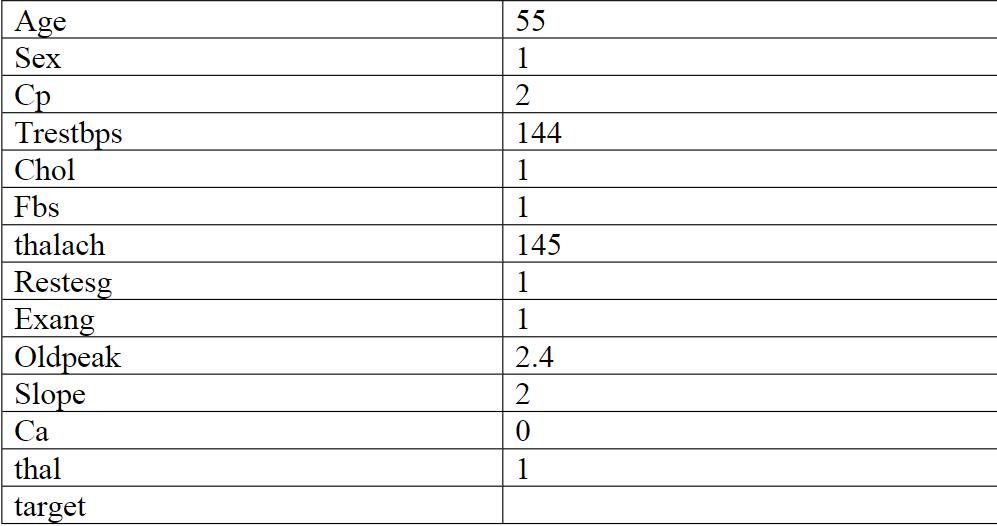

In [8]:
#Logistic Regression
w_values=[]
error_rate=[]

def Linear(w):
  data=pd.read_csv("heart.csv")
  data_x=data.iloc[:,0:13]
  data_y=data.iloc[:,13]
  data_x=data_x.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
  data_x.insert(0,"w0",1)
  x=np.array(data_x)
  y=np.array(data_y)
  
  
  y_predict=[]
  for i in range(0,303):
    c=0
    for j in range(0,len(w)):
      c+=w[j]*x[i][j]
    y_predict.append(c)
  w_values.append(w)
  
  y_f_x=[]
  for i in range(0,303):
    den=(1+math.exp(-y_predict[i]))
    val=1/den
    y_f_x.append(round(val,2))
  j_theta=[]
  for i in range(0,303):
    if (y_f_x[i]!=0):
      j_theta.append((y[i]*np.log2(y_f_x[i]))+(1-y[i])*(1-np.log2(y_f_x[i])))
    else:
      j_theta.append(0)
  
  j_t_sum=np.array(j_theta).mean()
  # print(round(j_t_sum,3))
  error_rate.append(j_t_sum)
  y_grad=[]
  for j in range(0,14):
    x_g=0
    for i in range(0,303):
      x_g+=(x[i][j]*(y[i]-y_f_x[i]))
    y_grad.append(x_g)
  new_y=[]
  for j in range(0,14):
    new_y.append(round(w[j]-(0.1)*(1/303)*y_grad[j],4))
  
  return new_y

w=[1,1,1,1,1,1,1,1,1,1,1,1,1,1]
for i in range(100):
  w=Linear(w)

print(error_rate)
z=np.array(error_rate).min()
index=error_rate.index(z)
print(w_values[index])
print(index)
#min value found at 7th iteration
  

[-0.03163618264464116, -0.061763879723328294, -0.08952065639311396, -0.13046411531996674, -0.1481399989106705, -0.1470082222527363, -0.13237936128812128, -0.17257451302515175, -0.14476360269024785, -0.13083156262119153, -0.11289809211231615, -0.13146778226538933, -0.13516344509539996, -0.1558107485659836, -0.12417988555226848, -0.12201072632020356, -0.04418475796852986, -0.023953034101203093, -0.024918928256422286, 0.011152606948088803, 0.029526272752718515, 0.03085479296093109, 0.0664927930887759, 0.08473226946588937, 0.07510818397456155, 0.05560550653337489, 0.03426898916430689, 0.06284753053389669, 0.08613888650289965, 0.09472893854800875, 0.10980694591332826, 0.11345586252810087, 0.12102116270520094, 0.14815151154004116, 0.19447159686033988, 0.18076807757448782, 0.18495401297410874, 0.14491193961193272, 0.1250451686640133, 0.1244435481425696, 0.11047642004453151, 0.09683021391078364, 0.07933588980101805, 0.0883134768411452, 0.09904987183447476, 0.12462834922703726, 0.13063506699272

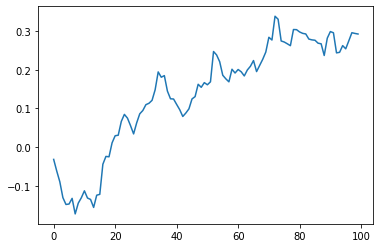

In [9]:
iter=np.arange(100)
plt.plot(iter,error_rate)